In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def plot(Xm, Pm, Ym):
    # Xm, Pm, Ym = Xm[:100], Pm[:100], Ym[:100]
    
    Pt = np.array([Pm[i, item] for i, item in enumerate(Ym)])
    p_diff = ((np.max(Pm, axis=1)).reshape(-1, 1) - Pt).flatten()    
    sorted_indices = np.argsort(p_diff)
    
    Xm = Xm[sorted_indices]
    Pm = Pm[sorted_indices]
    Ym = Ym[sorted_indices]
    
    fig, axes = plt.subplots(10, 20, figsize=(18, 10))
    axes = axes.flatten()
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
    for i, (xm, pm, ys) in enumerate(zip(Xm, Pm, Ym)):
        ax1, ax2 = axes[2*i], axes[2*i+1]
        ax1.imshow(xm.reshape(28, 28))
        ax2.bar(np.arange(10), pm)
        ax2.bar([np.argmax(pm)], [pm.max()], color="orange")
        ax2.bar(ys, pm[ys], color="red")
        ax2.text(-0.3, .85, str(ys), color="r", fontsize=8)
        ax2.text(7.1, .85, [np.argmax(pm)], color="orange", fontsize=8)
        ax2.set_ylim(0, 1)

    fig.tight_layout()
    
def sort(Xm, Pm, Ym):
    Pt = Pm

In [3]:
def top_n_error(n, Pm, Ym):
    misses = np.array([ym not in pm_indices 
                       for pm_indices, ym 
                       in zip(np.argsort(-Pm, axis=1)[:, :n], Ym)]).sum()
    return (misses / 10000) * 100

def test_log_likelihood(Pm, Ym):
    Pt = np.array([Pm[i, item] for i, item in enumerate(Ym)])
    Pt = np.log(Pt)
    return np.mean(Pt)

from observations import mnist
def data():
    (X, Y), (Xs, Ys) = mnist("./data")
    Y = Y.astype(int)
    Ys = Ys.astype(int)
    Y = Y.reshape(-1, 1)
    Ys = Ys.reshape(-1, 1)
    alpha = 255.0
    return X/alpha, Y, Xs/alpha, Ys

# CNN

In [4]:
results = np.load("results_cnn4.npz")
Pm_cnn, Xm_cnn, Ym_cnn = results["Pm"], results["Xm"], results["Ym"]
# Ym = np.argmax(Ym, axis=1).reshape(-1, 1)
Ym_cnn = Ym_cnn.reshape(-1, 1)

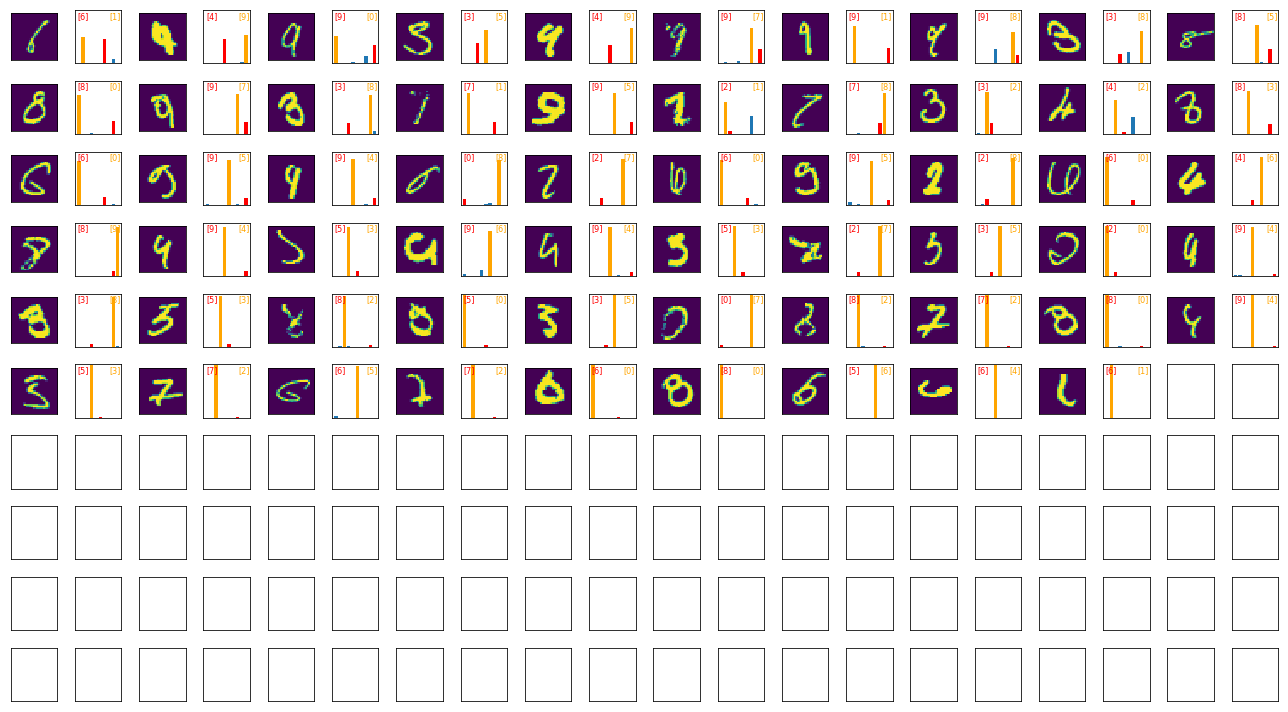

In [5]:
plot(Xm_cnn, Pm_cnn, Ym_cnn)
# plt.savefig("cnn_tf_tutorial_mnist_misclassified.pdf")
plt.show()

In [6]:
print(top_n_error(1, Pm_cnn, Ym_cnn))
print(top_n_error(2, Pm_cnn, Ym_cnn))
print(top_n_error(3, Pm_cnn, Ym_cnn))

0.59
0.08
0.01


In [7]:
test_log_likelihood(Pm_cnn, Ym_cnn)

-3.0578945

# Indexed Conv GP

In [9]:
results = np.load("weighted_conv_gp_results_new.npz")
Pm_gp, Xm_gp, Ym_gp, Pall_gp = results["Pm"], results["Xm"], results["Ym"], results["Pall"]

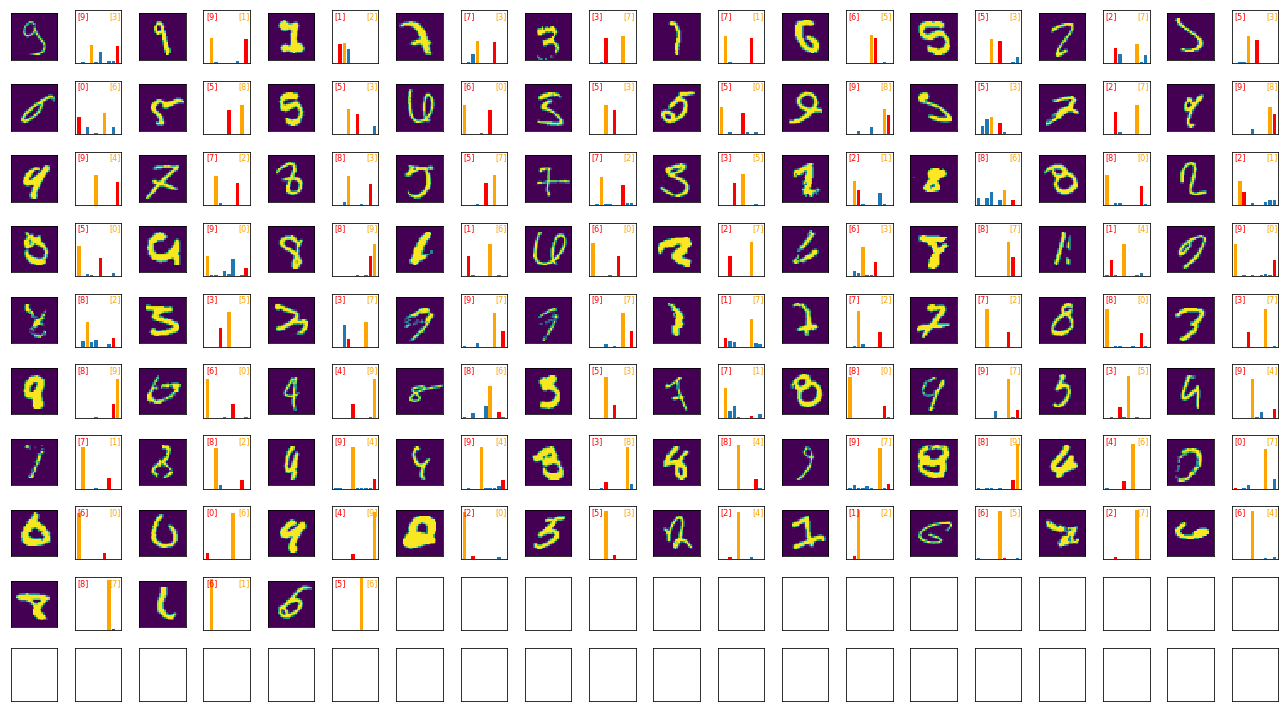

In [10]:
plot(Xm_gp, Pm_gp, Ym_gp)
# plt.savefig("convgp_mnist_misclassified.pdf")
plt.show()

In [6]:
print(top_n_error(1, Pm_gp, Ym_gp))
print(top_n_error(2, Pm_gp, Ym_gp))
print(top_n_error(3, Pm_gp, Ym_gp))

0.83
0.11
0.05


In [11]:
test_log_likelihood(Pm_gp, Ym_gp)

-1.698731011043637

In [12]:
_, _, Xs, Ys = data()

In [13]:
test_log_likelihood(Pall_gp, Ys)

-0.029171594618353617